# Research Questions
What countries had the highest/lowest vaccination rates?
Covid cases vs vaccinations?

In [11]:
import pandas as pd
from pathlib import Path
import numpy as np

In [12]:
age_group = Path("../Resources/vaccinations-by-age-group.csv")
manufacturer = Path("../Resources/vaccinations-by-manufacturer.csv")

In [13]:
age_group_df = pd.read_csv(age_group)
manufacturer_df = pd.read_csv(manufacturer)
print(age_group_df["location"].nunique())
print(manufacturer_df["location"].nunique())

38
44


In [14]:
age_group_df

,location,date,age_group,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,people_with_booster_per_hundred
0,Argentina,2020-01-01,100+,0.00,0.00,0.0
1,Argentina,2020-01-01,12-17,0.00,0.00,0.0
2,Argentina,2020-01-01,18-29,0.00,0.00,0.0
3,Argentina,2020-01-01,3-11,0.00,0.00,0.0
4,Argentina,2020-01-01,30-39,0.00,0.00,0.0
...,...,...,...,...,...,...
72535,Uruguay,2021-07-09,35-44,81.24,73.55,NaN
72536,Uruguay,2021-07-09,45-54,84.00,78.39,NaN
72537,Uruguay,2021-07-09,55-64,88.66,84.06,NaN
72538,Uruguay,2021-07-09,65-74,89.78,78.87,NaN


In [15]:
age_group_df = age_group_df.groupby(['location','age_group']).sum(['people_vaccinated_per_hundred'])
age_group_df.head(50)

people_vaccinated_per_hundred  \
location  age_group                                  
Argentina 100+                           113830.46   
          12-17                           75792.82   
          18-29                           88370.59   
          3-11                            66496.15   
          30-39                           92863.61   
          40-49                           94247.24   
          50-59                           93587.23   
          60-69                           99443.75   
          70-79                           99651.54   
          80-89                           95660.71   
          90-99                           85001.87   
Australia 12-15                           26285.46   
          16-19                           26588.90   
          20-29                           24232.61   
          30-39                           31685.69   
          40-49                           32335.07   
          5-11                              916.01   
          50-59                           34549.62   
          60-69                           41196.00   
          70-79                           45145.80   
          80-89                           45926.56   
          90+                             47179.53   
Austria   0-4                               132.09   
          10-14                            4346.59   
          15-17                            7632.47   
          18-24                            8560.08   
          25-49                            8623.44   
          5-9                              1947.80   
          50-59                            9443.49   
          60-69                            9803.29   
          70-79                           10516.31   
          80+                             11587.62   
Belgium   0-17                             3192.88   
          18-24                            9354.70   
          25-49                            9937.42   
          50-59                           11043.66   
          60-69                           11840.20   
          70-79                           12790.88   
          80+                             14497.95   
Bulgaria  0-17                              234.36   
          18-24                            3072.22   
          25-49                            3833.17   
          50-59                            4544.97   
          60-69                            5017.07   
          70-79                            4831.81   
          80+                              3252.81   
Canada    0-15                                0.00   
          0-4                               105.61   
          12-17                            5382.02   
          16-69                               0.45   

                     people_fully_vaccinated_per_hundred  \
location  age_group                                        
Argentina 100+                                  86425.37   
          12-17                                 50825.03   
          18-29                                 70735.96   
          3-11                                  51059.66   
          30-39                                 78068.00   
          40-49                                 79782.19   
          50-59                                 71416.35   
          60-69                                 70759.55   
          70-79                                 78732.79   
          80-89                                 81870.23   
          90-99                                 72720.13   
Australia 12-15                                 22940.90   
          16-19                                 23497.16   
          20-29                                 20976.96   
          30-39                                 28201.65   
          40-49                                 29111.83   
          5-11                                      1.65   
          50-59                                 30014.97   
          60

In [16]:
manufacturer_df

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401
...,...,...,...,...
67939,European Union,2024-05-03,Sanofi/GSK,5458
67940,European Union,2024-05-03,Sinopharm/Beijing,2320667
67941,European Union,2024-05-03,Sinovac,10664
67942,European Union,2024-05-03,Sputnik V,1845408


In [17]:
manufacturer_df = manufacturer_df.groupby(['location','vaccine']).sum('total_vaccinations')
manufacturer_df.head(50)

total_vaccinations
location  vaccine                               
Argentina CanSino                      291185458
          Moderna                    11087107891
          Oxford/AstraZeneca         12970855170
          Pfizer/BioNTech            14233097997
          Sinopharm/Beijing          20839350663
          Sputnik Light                  2992290
          Sputnik V                  11320592145
Austria   Johnson&Johnson               31187339
          Moderna                      163186061
          Novavax                         881547
          Oxford/AstraZeneca           148814463
          Pfizer/BioNTech             1516474588
          Sanofi/GSK                        5690
          Valneva                          77000
Belgium   Johnson&Johnson               39414527
          Moderna                      359018553
          Novavax                         111454
          Oxford/AstraZeneca           179896620
          Pfizer/BioNTech             2139368429
Bulgaria  Johnson&Johnson               49916981
          Moderna                       45978124
          Oxford/AstraZeneca            18735397
          Pfizer/BioNTech              322798311
Canada    Johnson&Johnson                 525703
          Medicago                          2246
          Moderna                      978738364
          Novavax                         171656
          Oxford/AstraZeneca           143618608
          Pfizer/BioNTech             2599371929
Chile     CanSino                              0
          Moderna                              0
          Oxford/AstraZeneca           154811664
          Pfizer/BioNTech             3477266625
          Sinovac                    11550207016
Croatia   Johnson&Johnson               20537713
          Moderna                       51701566
          Novavax                          31443
          Oxford/AstraZeneca            45754732
          Pfizer/BioNTech              451365562
Cyprus    Johnson&Johnson                2649277
          Moderna                       12513793
          Novavax                          10064
          Oxford/AstraZeneca            10381247
          Pfizer/BioNTech              125573083
Czechia   Covaxin                             55
          Johnson&Johnson              210091590
          Moderna                     1107677059
          Novavax                        3038146
          Oxford/AstraZeneca           256393039
          Pfizer/BioNTech            14174146411

In [18]:
total_vax = manufacturer_df.groupby(['location']).sum(['total_vaccinations'])
total_vax

,total_vaccinations
location,
Argentina,70745181614
Austria,1860626688
Belgium,2717809583
Bulgaria,437428813
Canada,3722428506
Chile,15182285305
Croatia,569391016
Cyprus,151127464
Czechia,15751384786


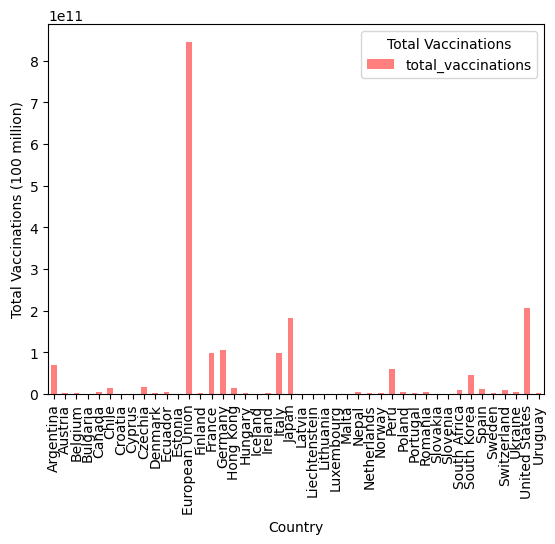

In [31]:
count_chart = total_vax.plot(kind='bar', color='red', alpha=0.5)
count_chart.set_xlabel('Country')
count_chart.set_ylabel('Total Vaccinations (100 million)')
count_chart.legend(title = 'Total Vaccinations')